In [6]:
import pandas as pd

def get_cik():
    ticker = pd.read_csv('ticker.txt', delimiter='\t', header=None)
    dow30 = pd.read_excel('dow30_complete.xlsx', index_col=0)

    dow30 = dow30.loc[:,['from', 'thru', 'co_conm', 'co_tic']]
    dow30['thru'] = dow30['thru'].replace('.','20201116')
    dow30['co_tic'] = dow30['co_tic'].apply(lambda x: str.lower(x))
    ticker = ticker.rename(columns={0:'co_tic',1:'cik'})

    dow30 = dow30.merge(ticker, how='left', on='co_tic')

    dow30['start_y'] = dow30['from'].apply(lambda x: int(str(x)[:4]))
    dow30['end_y'] = dow30['thru'].apply(lambda x: int(str(x)[:4]))

    dow30['start_q'] = dow30['from'].apply(lambda x: (int(str(x)[4:6])-1)//3+1)
    dow30['end_q'] = dow30['thru'].apply(lambda x: (int(str(x)[4:6])-1)//3+1)

    dow30 = dow30.loc[:,['start_y', 'start_q', 'end_y', 'end_q','cik']]
    dow30 = dow30.set_index('cik').T.to_dict('list')
    return dow30

In [7]:
dow30 = get_cik()

In [21]:
dow30

{40545: [1907, 4, 2018, 2],
 1467858: [1915, 1, 2009, 2],
 34088: [1928, 4, 2020, 3],
 21344: [1932, 2, 2020, 4],
 51143: [1932, 2, 2020, 4],
 80424: [1932, 2, 2020, 4],
 30554: [1935, 4, 2017, 3],
 1675149: [1959, 2, 2013, 3],
 101829: [1975, 2, 2020, 3],
 66740: [1976, 3, 2020, 4],
 310158: [1979, 2, 2020, 4],
 4962: [1982, 3, 2020, 4],
 63908: [1985, 4, 2020, 4],
 12927: [1987, 1, 2020, 4],
 18230: [1991, 2, 2020, 4],
 1744489: [1991, 2, 2020, 4],
 200406: [1997, 1, 2020, 4],
 104169: [1997, 1, 2020, 4],
 831001: [1997, 1, 2009, 2],
 47217: [1997, 1, 2013, 3],
 354950: [1999, 4, 2020, 4],
 50863: [1999, 4, 2020, 4],
 789019: [1999, 4, 2020, 4],
 732717: [1999, 4, 2015, 1],
 19617: [2001, 1, 2020, 4],
 732712: [2004, 2, 2020, 4],
 78003: [2004, 2, 2020, 3],
 93410: [2008, 1, 2020, 4],
 70858: [2008, 1, 2013, 3],
 1103982: [2008, 3, 2012, 3],
 858877: [2009, 2, 2020, 4],
 86312: [2009, 2, 2020, 4],
 731766: [2012, 3, 2020, 4],
 320187: [2013, 3, 2020, 4],
 886982: [2013, 3, 2020, 4],


In [19]:
import re

def cik_cut(s):
    pattern = ("(?<=_).*?(?=_)")
    result = re.findall(pattern, s)
    return result[0]

In [20]:
import pandas as pd

parser = pd.read_csv('Parser_Harvard.csv')

ticker = pd.read_csv('ticker.txt', delimiter='\t', header=None)
ticker = ticker.rename(columns={0:'co_tic',1:'cik'})

In [21]:
parser['filingdate'] = parser['file name,'].apply(lambda x: x[8:12] + '-' + x[12:14] + '-' + x[14:16])
parser['file name,'] = parser['file name,'].apply(lambda x: x[32:42])
parser['cik'] = parser['file name,'].apply(lambda x:int(cik_cut(x)))

parser = parser.drop(columns=['file name,'])

parser = parser.merge(right=ticker, how='left', on='cik')
parser = parser[['% negative,', 'cik', 'filingdate']]
parser = parser.drop_duplicates()
parser.to_csv('Parser_Harvard_Clean.csv',index=False)

In [22]:
parser

,"% negative,",cik,filingdate
0,2.768754,12927,2010-02-08
1,2.021098,101829,2010-02-11
2,1.139634,66740,2010-02-16
3,0.647461,30554,2010-02-17
5,1.726158,86312,2010-02-18
6,4.121938,18230,2010-02-19
7,3.468963,40545,2010-02-19
8,2.401010,50863,2010-02-22
9,1.070791,51143,2010-02-23
10,2.706707,19617,2010-02-24


In [1]:
import pandas as pd 
HARVARD_DICTIONARY_FILE = r'./Harvard_Dictionary.xls'
hv_dictionary = pd.read_excel(HARVARD_DICTIONARY_FILE,skiprows = [1])

In [23]:
import pandas as pd
HARVARD_DICTIONARY_FILE = r'./Harvard_Dictionary.xls'
hv_dictionary = pd.read_excel(HARVARD_DICTIONARY_FILE,skiprows = [1])
#change the alphanum to alpha and drop duplicates
hv_dictionary['Entry'] = hv_dictionary['Entry'].apply(lambda x:cut(str(x)))
hv_dictionary = hv_dictionary.drop_duplicates(subset=['Entry'], keep='first')

In [24]:
def cut(s):
    ans = []
    for i in range(len(s)):
        if s[i].isalpha():
            ans.append(s[i])
    return ''.join(ans)

cut("ABORVE#2")

'ABORVE'

In [27]:
hv_dictionary.to_csv('Harvard_Dictionary.csv',index=False)

In [2]:
import numpy as np
1+np.log(0)

C:\Users\bmy31\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


-inf

In [3]:
import pandas as pd

df = pd.read_csv('idf_weight_harvard.csv')

In [4]:
df.shape

(290, 8630)

In [5]:
p = pd.read_csv('Parser_Harvard.csv')

In [6]:
p

,"file name,","file size,","number of words,","% negative,","# of alphabetic,","# of digits,","# of numbers,","average word length,",vocabulary
0,./files\20100208_10-K_edgar_data_12927_0001193...,6274792,292731,2.768754,3952193,261227,92512,4.971537,1809
1,./files\20100211_10-K_edgar_data_101829_000119...,6819640,413884,2.021098,4324288,419572,97008,4.946524,1708
2,./files\20100216_10-K_edgar_data_66740_0001104...,12834085,726988,1.139634,8132885,673032,153523,4.872039,1941
3,./files\20100217_10-K_edgar_data_30554_0001047...,6507554,382880,0.647461,4230143,367025,76311,5.031906,1792
4,./files\20100218_10-K_edgar_data_86312_0001047...,11026836,562579,1.726158,7167547,357518,145797,5.010100,2111
5,./files\20100219_10-K_edgar_data_18230_0000018...,32681880,1011102,4.121938,11787077,1079198,300600,5.109748,2157
6,./files\20100219_10-K_edgar_data_40545_0000040...,22391867,1462022,3.468963,13479506,1182754,226809,4.908208,2341
7,./files\20100222_10-K_edgar_data_50863_0000950...,7415180,320740,2.401010,4220441,289147,99648,4.868314,1783
8,./files\20100223_10-K_edgar_data_51143_0001047...,16515375,933609,1.070791,10614733,840047,191785,4.836000,1978
9,./files\20100224_10-K_edgar_data_19617_0000950...,14110330,537886,2.706707,7617229,607644,203267,4.761316,2204


In [2]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


def get_filing_return(ticker, filingdate):
    startdate = pd.to_datetime(filingdate)
    closeprice = web.DataReader(name = ticker.upper(), data_source = 'yahoo', start = filingdate, end = startdate + timedelta(10))[['Adj Close']]
    returns = closeprice.iloc[4] / closeprice.iloc[0] - 1
    return returns


def merge_return(data):
    data['excessret'] = np.nan
    for i in range(len(data)):
        tick = ticker[ticker[1] == data.iloc[i]['cik']].index[0]
        try:
            stockret = get_filing_return(tick, data.iloc[i]['filingdate'])
            benchmark = get_filing_return('^DJI', data.iloc[i]['filingdate'])
            excessret = stockret - benchmark
      
            data['excessret'][data.index == i] = excessret.values[0]
        except:
            pass
        if (i+1)%10 == 0:
            print("{} files have been merged with returns".format(i+1))
    return data

In [3]:
master_data = pd.read_csv('Parser_Clean.csv')     
harvard_data = pd.read_csv('Parser_Harvard_Clean.csv')
ticker = pd.read_csv('./ticker.txt', delimiter='\t', header=None, index_col=0)

master_data = master_data.rename(columns={'% negative,': 'master %negative'})
harvard_data = harvard_data.rename(columns={'% negative,': 'harvard %negative'})
data = master_data.merge(right=harvard_data, on=['cik','filingdate'],how='inner')

In [4]:
ret_data = merge_return(data)

10 files have been merged with returns
20 files have been merged with returns
30 files have been merged with returns
40 files have been merged with returns
50 files have been merged with returns
60 files have been merged with returns
70 files have been merged with returns
80 files have been merged with returns
90 files have been merged with returns
100 files have been merged with returns
110 files have been merged with returns
120 files have been merged with returns
130 files have been merged with returns
140 files have been merged with returns
150 files have been merged with returns
160 files have been merged with returns
170 files have been merged with returns
180 files have been merged with returns
190 files have been merged with returns
200 files have been merged with returns
210 files have been merged with returns
220 files have been merged with returns
230 files have been merged with returns
240 files have been merged with returns
250 files have been merged with returns
260 files

In [5]:
def get_result(ret_data):

    def quantile_calc(x, _quantiles=5):
        return pd.qcut(x, _quantiles, labels=False) + 1

    grouped_data = ret_data.copy()
    grouped_data = grouped_data.dropna()
    grouped_data['master_group'] = quantile_calc(grouped_data['master %negative'])
    grouped_data['harvard_group'] = quantile_calc(grouped_data['harvard %negative'])
    grouped_data['excessret'] = grouped_data['excessret']*100

    master_result = grouped_data[['master_group', 'excessret']].groupby('master_group').agg({'excessret': 'median'})
    harvard_result = grouped_data[['harvard_group', 'excessret']].groupby('harvard_group').agg({'excessret': 'median'})
    master_result.index = ['Low', '2', '3', '4', 'High']
    harvard_result.index = ['Low', '2', '3', '4', 'High']

    return master_result, harvard_result

In [6]:
master_result, harvard_result = get_result(ret_data)

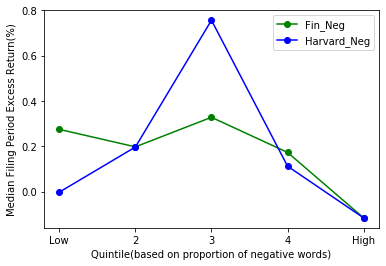

In [8]:
_ = plt.plot(master_result, 'go-', label='Fin_Neg')
_ = plt.plot(harvard_result, 'bo-', label='Harvard_Neg')
_ = plt.xlabel('Quintile(based on proportion of negative words)')
_ = plt.ylabel('Median Filing Period Excess Return(%)')
_ = plt.legend(loc='best')